<a href="https://colab.research.google.com/github/anuragGsoc/anuragGsoc/blob/main/HateSpeech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
#graph
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
#preprocessing
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
#model building
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# New Section

In [2]:

tweet_df = pd.read_csv('train.csv')
tweet_df.head()
tweet_df.info()
print()
print("printing random tweets : ")
print()
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[14],"\n")
print(tweet_df['tweet'].iloc[15],"\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB

printing random tweets : 

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

  bihday your majesty 

no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins 

ouch...junior is angryð#got7 #junior #yugyoem   #omg  



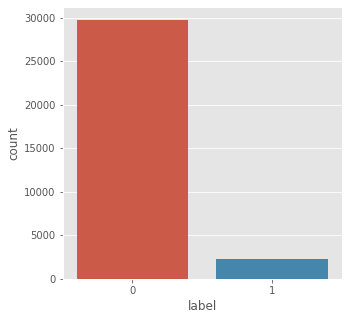

In [3]:

fig = plt.figure(figsize=(5,5)) 
sns.countplot(x='label', data = tweet_df)


Text(0.5, 1.0, 'Distribution of sentiments')

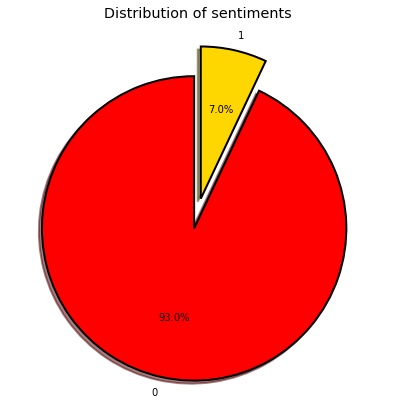

In [4]:

fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')

plt.title('Distribution of sentiments')


In [5]:

print("normal speach tweets : ")
non_hate_tweets = tweet_df[tweet_df.label == 0]
non_hate_tweets.head()



normal speach tweets : 


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
print("Hate speach tweets : ")
hate_tweets = tweet_df[tweet_df.label == 1]
hate_tweets.head()



Hate speach tweets : 


,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [7]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(tweet_df['tweet'])
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 25 features: \n{}".format(feature_names[:25]))

vect = TfidfVectorizer(ngram_range=(1,3)).fit(tweet_df['tweet']) 
#used to map most frequnt words using inmemory vocabulary(python dict)

feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 25 features: \n{}".format(feature_names[:25]))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features: 228267

First 25 features: 
['00', '00 35', '00 and', '00 blog', '00 drops', '00 folkmusic', '00 from', '00 get', '00 hours', '00 level', '00 mark', '00 on', '00 online', '00 open', '00 psychological', '00 shopalyssas', '00 suppo', '00 upsideofflorida', '00 warnung', '00 what', '000', '000 27', '000 agree', '000 bihday', '000 emiratisâ']
Number of features: 481885

First 25 features: 
['00', '00 35', '00 and', '00 and 13', '00 blog', '00 blog silver', '00 drops', '00 drops to', '00 folkmusic', '00 from', '00 from vendor', '00 get', '00 get here', '00 hours', '00 hours would', '00 level', '00 level after', '00 mark', '00 mark from', '00 on', '00 on profit', '00 online', '00 online pure', '00 open', '00 open to']


In [8]:
X = tweet_df['tweet']
Y = tweet_df['label']
X = vect.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))



Size of x_train: (25569, 481885)
Size of y_train: (25569,)
Size of x_test:  (6393, 481885)
Size of y_test:  (6393,)


In [9]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy using LogisticRegration : {:.2f}%".format(logreg_acc*100))

print()
print(confusion_matrix(y_test, logreg_predict))
print(classification_report(y_test, logreg_predict))


Test accuarcy using LogisticRegration : 93.68%

[[5937    0]
 [ 404   52]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5937
           1       1.00      0.11      0.20       456

    accuracy                           0.94      6393
   macro avg       0.97      0.56      0.59      6393
weighted avg       0.94      0.94      0.91      6393



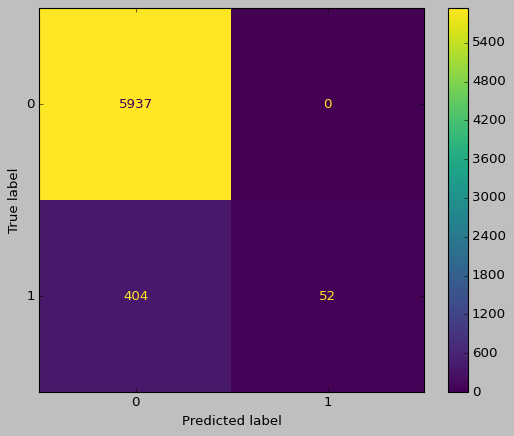

In [10]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()


In [11]:
#svm
from sklearn.svm import SVC
from sklearn import metrics
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
pred = svclassifier.predict(x_test)
print("Test Accurecy using Linear SVM:")
print(metrics.accuracy_score(y_test, pred)*100)

print()
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
  

Test Accurecy using Linear SVM:
95.62020960425465

[[5936    1]
 [ 279  177]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5937
           1       0.99      0.39      0.56       456

    accuracy                           0.96      6393
   macro avg       0.97      0.69      0.77      6393
weighted avg       0.96      0.96      0.95      6393

